### This script contains the following:
#### 1. Importing Libraries & Data
#### 2. Addressing Zero values
#### 3. Deriving new varibables:  
#### 4. Exporting Data

### 1. Importing Libraries & Data

In [297]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [298]:
# Project folder path

path=r'/Users/sukihabibe/Desktop/CareerFoundry/Portofolio_A6/World_Happiness_Report'

In [299]:
# Importing data

df=pd.read_csv(os.path.join(path, '02_Data', 'Prepared', 'df_all3.csv'))

In [300]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Year,Country,Region,Overall rank,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Happiness-range
0,0,0,2019,Finland,Western Europe,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393,High score
1,1,1,2019,Denmark,Western Europe,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410,High score
2,2,2,2019,Norway,Western Europe,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341,High score
3,3,3,2019,Iceland,Western Europe,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118,High score
4,4,4,2019,Netherlands,Western Europe,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298,High score


In [301]:
# Drop 'Unnamed:0' & Unnamed:0.1

df=df.drop("Unnamed: 0",axis=1)

df=df.drop("Unnamed: 0.1",axis=1)

### 2. Zero Values Analysis

#### 2a. Zero values in GDP 

In [302]:
# Create a boolean mask that checks for 0 values in the "GDP" column
mask = df['GDP per capita'].eq(0)

# Use boolean indexing to select only the rows where the "GDP" value is 0
result = df[mask]

# Print the result
result

,Year,Country,Region,Overall rank,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Happiness-range
111,2019,Somalia,Sub-Saharan Africa,112,4.668,0.0,0.69800,0.268000,0.559000,0.243000,0.270000,Middle score
253,2018,Somalia,Sub-Saharan Africa,98,4.982,0.0,0.71200,0.115000,0.674000,0.238000,0.282000,Middle score
466,2017,Central African Republic,Sub-Saharan Africa,155,2.693,0.0,0.00000,0.018773,0.270842,0.280876,0.056565,Low score
542,2016,Somalia,Sub-Saharan Africa,76,5.440,0.0,0.33613,0.114660,0.567780,0.272250,0.311800,Middle score
743,2015,Democratic Republic of the Congo,Sub-Saharan Africa,120,4.517,0.0,1.00120,0.098060,0.226050,0.248340,0.076250,Middle score


In [303]:
# Look for suitable replacement for missing values in Somalia

df.loc[df['Country'] == 'Somalia']

,Year,Country,Region,Overall rank,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Happiness-range
111,2019,Somalia,Sub-Saharan Africa,112,4.668,0.000000,0.698000,0.268000,0.559000,0.243000,0.27000,Middle score
253,2018,Somalia,Sub-Saharan Africa,98,4.982,0.000000,0.712000,0.115000,0.674000,0.238000,0.28200,Middle score
404,2017,Somalia,Sub-Saharan Africa,93,5.151,0.022643,0.721151,0.113989,0.602127,0.291631,0.28241,Middle score
542,2016,Somalia,Sub-Saharan Africa,76,5.440,0.000000,0.336130,0.114660,0.567780,0.272250,0.31180,Middle score


In [304]:
# Replace with same value as 2017

df.loc[(df['Country'] == 'Somalia') & (df['GDP per capita'] == 0), 'GDP per capita'] = 0.022643

In [305]:
# CHECK if replacement for missing values in Somalia was succesful

df.loc[df['Country'] == 'Somalia']

,Year,Country,Region,Overall rank,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Happiness-range
111,2019,Somalia,Sub-Saharan Africa,112,4.668,0.022643,0.698000,0.268000,0.559000,0.243000,0.27000,Middle score
253,2018,Somalia,Sub-Saharan Africa,98,4.982,0.022643,0.712000,0.115000,0.674000,0.238000,0.28200,Middle score
404,2017,Somalia,Sub-Saharan Africa,93,5.151,0.022643,0.721151,0.113989,0.602127,0.291631,0.28241,Middle score
542,2016,Somalia,Sub-Saharan Africa,76,5.440,0.022643,0.336130,0.114660,0.567780,0.272250,0.31180,Middle score


In [306]:
# Look for suitable replacement for missing values in Central African Republic

df.loc[df['Country'] == 'Central African Republic']

,Year,Country,Region,Overall rank,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Happiness-range
154,2019,Central African Republic,Sub-Saharan Africa,155,3.083,0.0260,0.0,0.105000,0.225000,0.235000,0.035000,Low score
310,2018,Central African Republic,Sub-Saharan Africa,155,3.083,0.0240,0.0,0.010000,0.305000,0.218000,0.038000,Low score
466,2017,Central African Republic,Sub-Saharan Africa,155,2.693,0.0000,0.0,0.018773,0.270842,0.280876,0.056565,Low score
771,2015,Central African Republic,Sub-Saharan Africa,148,3.678,0.0785,0.0,0.066990,0.488790,0.238350,0.082890,Low score


In [307]:
# Replacement value Calculation = .0785-.0240=.0545/3=.0182*2=0.0364 deducted from .0785 is 0.421
# 2015-2018=x/3*2=y (to cover missing year 2016). New value=2015-y

df.loc[(df['Country'] == 'Central African Republic') & (df['GDP per capita'] == 0), 'GDP per capita'] = 0.0421

In [308]:
# CHECK if replacement for missing values in Central African Republic was succesful

df.loc[df['Country'] == 'Central African Republic']

,Year,Country,Region,Overall rank,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Happiness-range
154,2019,Central African Republic,Sub-Saharan Africa,155,3.083,0.0260,0.0,0.105000,0.225000,0.235000,0.035000,Low score
310,2018,Central African Republic,Sub-Saharan Africa,155,3.083,0.0240,0.0,0.010000,0.305000,0.218000,0.038000,Low score
466,2017,Central African Republic,Sub-Saharan Africa,155,2.693,0.0421,0.0,0.018773,0.270842,0.280876,0.056565,Low score
771,2015,Central African Republic,Sub-Saharan Africa,148,3.678,0.0785,0.0,0.066990,0.488790,0.238350,0.082890,Low score


In [309]:
# Look for suitable replacement for missing values in Democratic Republic of the Congo

df.loc[df['Country'] == 'Democratic Republic of the Congo']

,Year,Country,Region,Overall rank,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Happiness-range
126,2019,Democratic Republic of the Congo,Sub-Saharan Africa,127,4.418,0.094000,1.125000,0.357000,0.269000,0.212000,0.053000,Low score
287,2018,Democratic Republic of the Congo,Sub-Saharan Africa,132,4.245,0.069000,1.136000,0.204000,0.312000,0.197000,0.052000,Low score
437,2017,Democratic Republic of the Congo,Sub-Saharan Africa,126,4.280,0.092102,1.229023,0.191407,0.235961,0.246456,0.060241,Low score
591,2016,Democratic Republic of the Congo,Sub-Saharan Africa,125,4.272,0.056610,0.806760,0.188000,0.156020,0.254580,0.060750,Low score
743,2015,Democratic Republic of the Congo,Sub-Saharan Africa,120,4.517,0.000000,1.001200,0.098060,0.226050,0.248340,0.076250,Middle score


In [310]:
# The data is showing a up and down cicle for the GDP per capita. 
# I will replace this value based on the apparent cicle: new value is 0.09 I decided to


df.loc[(df['Country'] == 'Democratic Republic of the Congo') & (df['GDP per capita'] == 0), 'GDP per capita'] = 0.09

In [311]:
# CHECK if replacement for missing values in Democratic Republic of the Congo was succesful

df.loc[df['Country'] == 'Democratic Republic of the Congo']

,Year,Country,Region,Overall rank,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Happiness-range
126,2019,Democratic Republic of the Congo,Sub-Saharan Africa,127,4.418,0.094000,1.125000,0.357000,0.269000,0.212000,0.053000,Low score
287,2018,Democratic Republic of the Congo,Sub-Saharan Africa,132,4.245,0.069000,1.136000,0.204000,0.312000,0.197000,0.052000,Low score
437,2017,Democratic Republic of the Congo,Sub-Saharan Africa,126,4.280,0.092102,1.229023,0.191407,0.235961,0.246456,0.060241,Low score
591,2016,Democratic Republic of the Congo,Sub-Saharan Africa,125,4.272,0.056610,0.806760,0.188000,0.156020,0.254580,0.060750,Low score
743,2015,Democratic Republic of the Congo,Sub-Saharan Africa,120,4.517,0.090000,1.001200,0.098060,0.226050,0.248340,0.076250,Middle score


#### 2b. Zero values in Social support

In [312]:
# Create a boolean mask that checks for 0 values in the "GDP" column
mask = df['Social support'].eq(0)

# Use boolean indexing to select only the rows where the "GDP" value is 0
result = df[mask]

# Print the result
result

,Year,Country,Region,Overall rank,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Happiness-range
154,2019,Central African Republic,Sub-Saharan Africa,155,3.083,0.02600,0.0,0.105000,0.225000,0.235000,0.035000,Low score
310,2018,Central African Republic,Sub-Saharan Africa,155,3.083,0.02400,0.0,0.010000,0.305000,0.218000,0.038000,Low score
466,2017,Central African Republic,Sub-Saharan Africa,155,2.693,0.04210,0.0,0.018773,0.270842,0.280876,0.056565,Low score
621,2016,Togo,Sub-Saharan Africa,155,3.303,0.28123,0.0,0.248110,0.346780,0.175170,0.115870,Low score
771,2015,Central African Republic,Sub-Saharan Africa,148,3.678,0.07850,0.0,0.066990,0.488790,0.238350,0.082890,Low score


In [ ]:
# Look for suitable replacement for missing values in Somalia

df.loc[df['Country'] == 'Central African Republic']

#### No values for all 4 years. Will leave it blank for now, but would need to exclude it when analysing Social support in this Region.

In [314]:
# Look for suitable replacement for missing values in Somalia

df.loc[df['Country'] == 'Togo']

,Year,Country,Region,Overall rank,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Happiness-range
138,2019,Togo,Sub-Saharan Africa,139,4.085,0.275000,0.572000,0.410000,0.293000,0.177000,0.085000,Low score
294,2018,Togo,Sub-Saharan Africa,139,3.999,0.259000,0.474000,0.253000,0.434000,0.158000,0.101000,Low score
461,2017,Togo,Sub-Saharan Africa,150,3.495,0.305445,0.431883,0.247106,0.380426,0.196896,0.095665,Low score
621,2016,Togo,Sub-Saharan Africa,155,3.303,0.281230,0.000000,0.248110,0.346780,0.175170,0.115870,Low score
781,2015,Togo,Sub-Saharan Africa,158,2.839,0.208680,0.139950,0.284430,0.364530,0.166810,0.107310,Low score


In [315]:
# Replace with average of 2015 and 2017 values: .431883-.139950=.291933

df.loc[(df['Country'] == 'Togo') & (df['Social support'] == 0), 'Social support'] = 0.291933

In [316]:
# CHECK if replacement for missing values in Central African Republic was succesful

df.loc[df['Country'] == 'Togo']

,Year,Country,Region,Overall rank,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Happiness-range
138,2019,Togo,Sub-Saharan Africa,139,4.085,0.275000,0.572000,0.410000,0.293000,0.177000,0.085000,Low score
294,2018,Togo,Sub-Saharan Africa,139,3.999,0.259000,0.474000,0.253000,0.434000,0.158000,0.101000,Low score
461,2017,Togo,Sub-Saharan Africa,150,3.495,0.305445,0.431883,0.247106,0.380426,0.196896,0.095665,Low score
621,2016,Togo,Sub-Saharan Africa,155,3.303,0.281230,0.291933,0.248110,0.346780,0.175170,0.115870,Low score
781,2015,Togo,Sub-Saharan Africa,158,2.839,0.208680,0.139950,0.284430,0.364530,0.166810,0.107310,Low score


#### 2c. Zero values in Healthy

In [317]:
# Create a boolean mask that checks for 0 values in the "GDP" column
mask = df['Healthy life expectancy'].eq(0)

# Use boolean indexing to select only the rows where the "GDP" value is 0
result = df[mask]

# Print the result
result

,Year,Country,Region,Overall rank,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Happiness-range
134,2019,Swaziland,Sub-Saharan Africa,135,4.212,0.811000,1.149000,0.0,0.313000,0.074000,0.135000,Low score
268,2018,Sierra Leone,Sub-Saharan Africa,113,4.571,0.256000,0.813000,0.0,0.355000,0.238000,0.053000,Middle score
450,2017,Lesotho,Sub-Saharan Africa,139,3.808,0.521021,1.190095,0.0,0.390661,0.157497,0.119095,Low score
577,2016,Sierra Leone,Sub-Saharan Africa,111,4.635,0.364850,0.628000,0.0,0.306850,0.238970,0.081960,Middle score
746,2015,Sierra Leone,Sub-Saharan Africa,123,4.507,0.330240,0.955710,0.0,0.408400,0.214880,0.087860,Middle score


In [318]:
# Look for suitable replacement for missing values in Somalia

df.loc[df['Country'] == 'Swaziland']

,Year,Country,Region,Overall rank,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Happiness-range
134,2019,Swaziland,Sub-Saharan Africa,135,4.212,0.81100,1.14900,0.00000,0.31300,0.07400,0.1350,Low score
724,2015,Swaziland,Sub-Saharan Africa,101,4.867,0.71206,1.07284,0.07566,0.30658,0.18259,0.0306,Middle score


In [319]:
# Replace with same value as 2015

df.loc[(df['Country'] == 'Swaziland') & (df['Healthy life expectancy'] == 0), 'Healthy life expectancy'] = 0.07566

In [320]:
# CHECK if replacement for missing values in Central African Republic was succesful

df.loc[df['Country'] == 'Swaziland']

,Year,Country,Region,Overall rank,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Happiness-range
134,2019,Swaziland,Sub-Saharan Africa,135,4.212,0.81100,1.14900,0.07566,0.31300,0.07400,0.1350,Low score
724,2015,Swaziland,Sub-Saharan Africa,101,4.867,0.71206,1.07284,0.07566,0.30658,0.18259,0.0306,Middle score


In [321]:
# Look for suitable replacement for missing values in Somalia

df.loc[df['Country'] == 'Sierra Leone']

,Year,Country,Region,Overall rank,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Happiness-range
128,2019,Sierra Leone,Sub-Saharan Africa,129,4.374,0.268000,0.841000,0.242000,0.309000,0.252000,0.045000,Low score
268,2018,Sierra Leone,Sub-Saharan Africa,113,4.571,0.256000,0.813000,0.000000,0.355000,0.238000,0.053000,Middle score
417,2017,Sierra Leone,Sub-Saharan Africa,106,4.709,0.368421,0.984136,0.005565,0.318698,0.293041,0.071095,Middle score
577,2016,Sierra Leone,Sub-Saharan Africa,111,4.635,0.364850,0.628000,0.000000,0.306850,0.238970,0.081960,Middle score
746,2015,Sierra Leone,Sub-Saharan Africa,123,4.507,0.330240,0.955710,0.000000,0.408400,0.214880,0.087860,Middle score


In [322]:
African=df.loc[df['Region']== 'Sub-Saharan Africa']

<AxesSubplot:xlabel='Healthy life expectancy', ylabel='Count'>

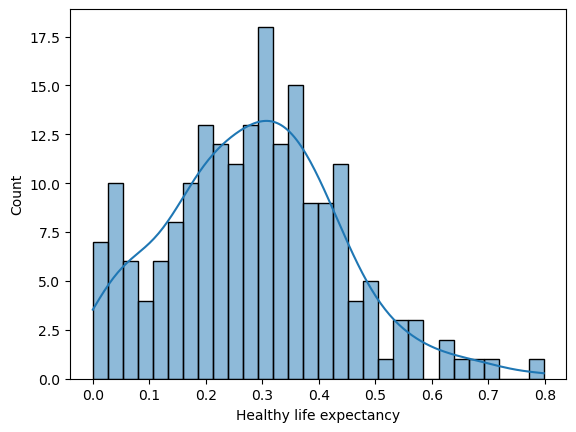

In [323]:
sns.histplot(African['Healthy life expectancy'], bins = 30, kde = True)

#### Looking at the data above, I am not comfortable making a decicion for replacing 0 values. We will keep them as is and remove them from Healthy life expectancy when analyzing this factor.

In [324]:
# Look for suitable replacement for missing values in Somalia

df.loc[df['Country'] == 'Lesotho']

,Year,Country,Region,Overall rank,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Happiness-range
143,2019,Lesotho,Sub-Saharan Africa,144,3.802,0.489000,1.169000,0.16800,0.359000,0.107000,0.093000,Low score
296,2018,Lesotho,Sub-Saharan Africa,141,3.808,0.472000,1.215000,0.07900,0.423000,0.116000,0.112000,Low score
450,2017,Lesotho,Sub-Saharan Africa,139,3.808,0.521021,1.190095,0.00000,0.390661,0.157497,0.119095,Low score
720,2015,Lesotho,Sub-Saharan Africa,97,4.898,0.375450,1.041030,0.07612,0.317670,0.163880,0.125040,Middle score


In [325]:
# Replacement value Calculation = .07612-.07900=.00288/3=.00096*2=.00192 added to .07612 is 0.07804
# 2015-2018=x/3*2=y (to cover missing year 2016). New value=2015-y

df.loc[(df['Country'] == 'Lesotho') & (df['Healthy life expectancy'] == 0), 'Healthy life expectancy'] = 0.07804

In [326]:
# CHECK if replacement for missing values in Lesotho was succesful

df.loc[df['Country'] == 'Lesotho']

,Year,Country,Region,Overall rank,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Happiness-range
143,2019,Lesotho,Sub-Saharan Africa,144,3.802,0.489000,1.169000,0.16800,0.359000,0.107000,0.093000,Low score
296,2018,Lesotho,Sub-Saharan Africa,141,3.808,0.472000,1.215000,0.07900,0.423000,0.116000,0.112000,Low score
450,2017,Lesotho,Sub-Saharan Africa,139,3.808,0.521021,1.190095,0.07804,0.390661,0.157497,0.119095,Low score
720,2015,Lesotho,Sub-Saharan Africa,97,4.898,0.375450,1.041030,0.07612,0.317670,0.163880,0.125040,Middle score


#### 2d. Zero values in Freedom

In [327]:
# Create a boolean mask that checks for 0 values in the "GDP" column
mask = df['Freedom to make life choices'].eq(0)

# Use boolean indexing to select only the rows where the "GDP" value is 0
result = df[mask]

# Print the result
result

,Year,Country,Region,Overall rank,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Happiness-range
153,2019,Afghanistan,Southern Asia,154,3.203,0.350000,0.517000,0.361000,0.0,0.158000,0.02500,Low score
297,2018,Angola,Sub-Saharan Africa,142,3.795,0.730000,1.125000,0.269000,0.0,0.079000,0.06100,Low score
451,2017,Angola,Sub-Saharan Africa,140,3.795,0.858428,1.104412,0.049869,0.0,0.097926,0.06972,Low score
599,2016,Sudan,Sub-Saharan Africa,133,4.139,0.630690,0.819280,0.297590,0.0,0.180770,0.10039,Low score
735,2015,Iraq,Middle East and Northern Africa,112,4.677,0.985490,0.818890,0.602370,0.0,0.179220,0.13788,Middle score


In [328]:
# Look for suitable replacement for missing values in Somalia

df.loc[df['Country'] == 'Afghanistan']

,Year,Country,Region,Overall rank,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Happiness-range
153,2019,Afghanistan,Southern Asia,154,3.203,0.350000,0.517000,0.361000,0.00000,0.158000,0.025000,Low score
300,2018,Afghanistan,Southern Asia,145,3.632,0.332000,0.537000,0.255000,0.08500,0.191000,0.036000,Low score
452,2017,Afghanistan,Southern Asia,141,3.794,0.401477,0.581543,0.180747,0.10618,0.311871,0.061158,Low score
620,2016,Afghanistan,Southern Asia,154,3.360,0.382270,0.110370,0.173440,0.16430,0.312680,0.071120,Low score
776,2015,Afghanistan,Southern Asia,153,3.575,0.319820,0.302850,0.303350,0.23414,0.365100,0.097190,Low score


In [329]:
# I will use the average of the last 2 years: .08500+.10618/2=.09559


df.loc[(df['Country'] == 'Afghanistan') & (df['Freedom to make life choices'] == 0), 'Freedom to make life choices'] = 0.09559

In [330]:
# CHECK if replacement for missing values in Central African Republic was succesful

df.loc[df['Country'] == 'Afghanistan']

,Year,Country,Region,Overall rank,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Happiness-range
153,2019,Afghanistan,Southern Asia,154,3.203,0.350000,0.517000,0.361000,0.09559,0.158000,0.025000,Low score
300,2018,Afghanistan,Southern Asia,145,3.632,0.332000,0.537000,0.255000,0.08500,0.191000,0.036000,Low score
452,2017,Afghanistan,Southern Asia,141,3.794,0.401477,0.581543,0.180747,0.10618,0.311871,0.061158,Low score
620,2016,Afghanistan,Southern Asia,154,3.360,0.382270,0.110370,0.173440,0.16430,0.312680,0.071120,Low score
776,2015,Afghanistan,Southern Asia,153,3.575,0.319820,0.302850,0.303350,0.23414,0.365100,0.097190,Low score


In [331]:
# Look for suitable replacement for missing values in Somalia

df.loc[df['Country'] == 'Angola']

,Year,Country,Region,Overall rank,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Happiness-range
297,2018,Angola,Sub-Saharan Africa,142,3.795,0.730000,1.125000,0.269000,0.00000,0.079000,0.06100,Low score
451,2017,Angola,Sub-Saharan Africa,140,3.795,0.858428,1.104412,0.049869,0.00000,0.097926,0.06972,Low score
607,2016,Angola,Sub-Saharan Africa,141,3.866,0.847310,0.663660,0.049910,0.00589,0.120710,0.08434,Low score
760,2015,Angola,Sub-Saharan Africa,137,4.033,0.757780,0.860400,0.166830,0.10384,0.123440,0.07122,Low score


In [332]:
# I will use the average of 2015 and 2016 2 years: .10384+.00589/2=.054865


df.loc[(df['Country'] == 'Angola') & (df['Freedom to make life choices'] == 0), 'Freedom to make life choices'] = 0.054865

In [333]:
# CHECK if replacement for missing values in Angola was succesful

df.loc[df['Country'] == 'Angola']

,Year,Country,Region,Overall rank,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Happiness-range
297,2018,Angola,Sub-Saharan Africa,142,3.795,0.730000,1.125000,0.269000,0.054865,0.079000,0.06100,Low score
451,2017,Angola,Sub-Saharan Africa,140,3.795,0.858428,1.104412,0.049869,0.054865,0.097926,0.06972,Low score
607,2016,Angola,Sub-Saharan Africa,141,3.866,0.847310,0.663660,0.049910,0.005890,0.120710,0.08434,Low score
760,2015,Angola,Sub-Saharan Africa,137,4.033,0.757780,0.860400,0.166830,0.103840,0.123440,0.07122,Low score


In [334]:
# Look for suitable replacement for missing values in Sudan

df.loc[df['Country'] == 'Sudan']

,Year,Country,Region,Overall rank,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Happiness-range
292,2018,Sudan,Sub-Saharan Africa,137,4.139,0.605000,1.240000,0.312000,0.016000,0.134000,0.082000,Low score
441,2017,Sudan,Sub-Saharan Africa,130,4.139,0.659517,1.214009,0.290921,0.014996,0.182317,0.089848,Low score
599,2016,Sudan,Sub-Saharan Africa,133,4.139,0.630690,0.819280,0.297590,0.000000,0.180770,0.100390,Low score
741,2015,Sudan,Sub-Saharan Africa,118,4.550,0.521070,1.014040,0.368780,0.100810,0.190620,0.146600,Middle score


In [335]:
# I will use the average of 2015 and 2017: 0.100810+0.014996/2= 0.057903

df.loc[(df['Country'] == 'Sudan') & (df['Freedom to make life choices'] == 0), 'Freedom to make life choices'] = 0.057903

In [336]:
# CHECK if replacement for missing values in Sudan was succesful

df.loc[df['Country'] == 'Sudan']

,Year,Country,Region,Overall rank,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Happiness-range
292,2018,Sudan,Sub-Saharan Africa,137,4.139,0.605000,1.240000,0.312000,0.016000,0.134000,0.082000,Low score
441,2017,Sudan,Sub-Saharan Africa,130,4.139,0.659517,1.214009,0.290921,0.014996,0.182317,0.089848,Low score
599,2016,Sudan,Sub-Saharan Africa,133,4.139,0.630690,0.819280,0.297590,0.057903,0.180770,0.100390,Low score
741,2015,Sudan,Sub-Saharan Africa,118,4.550,0.521070,1.014040,0.368780,0.100810,0.190620,0.146600,Middle score


In [337]:
# Look for suitable replacement for missing values in Iraq

df.loc[df['Country'] == 'Iraq']

,Year,Country,Region,Overall rank,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Happiness-range
125,2019,Iraq,Middle East and Northern Africa,126,4.437,1.04300,0.980000,0.57400,0.241000,0.148000,0.089000,Low score
272,2018,Iraq,Middle East and Northern Africa,117,4.456,1.01000,0.971000,0.53600,0.304000,0.148000,0.095000,Low score
428,2017,Iraq,Middle East and Northern Africa,117,4.497,1.10271,0.978613,0.50118,0.288556,0.199637,0.107216,Low score
578,2016,Iraq,Middle East and Northern Africa,112,4.575,1.07474,0.592050,0.51076,0.248560,0.195890,0.136360,Middle score
735,2015,Iraq,Middle East and Northern Africa,112,4.677,0.98549,0.818890,0.60237,0.000000,0.179220,0.137880,Middle score


In [338]:
# I will use the average of all 4 values available

df.loc[(df['Country'] == 'Iraq') & (df['Freedom to make life choices'] == 0), 'Freedom to make life choices'] = 0.270529

In [339]:
# CHECK if replacement for missing values in Angola was succesful

df.loc[df['Country'] == 'Iraq']

,Year,Country,Region,Overall rank,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Happiness-range
125,2019,Iraq,Middle East and Northern Africa,126,4.437,1.04300,0.980000,0.57400,0.241000,0.148000,0.089000,Low score
272,2018,Iraq,Middle East and Northern Africa,117,4.456,1.01000,0.971000,0.53600,0.304000,0.148000,0.095000,Low score
428,2017,Iraq,Middle East and Northern Africa,117,4.497,1.10271,0.978613,0.50118,0.288556,0.199637,0.107216,Low score
578,2016,Iraq,Middle East and Northern Africa,112,4.575,1.07474,0.592050,0.51076,0.248560,0.195890,0.136360,Middle score
735,2015,Iraq,Middle East and Northern Africa,112,4.677,0.98549,0.818890,0.60237,0.270529,0.179220,0.137880,Middle score


#### 2e. Zero values in Generosity

In [340]:
# Create a boolean mask that checks for 0 values in the "GDP" column
mask = df['Generosity'].eq(0)

# Use boolean indexing to select only the rows where the "GDP" value is 0
result = df[mask]

# Print the result
result

,Year,Country,Region,Overall rank,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Happiness-range
81,2019,Greece,Western Europe,82,5.287,1.181000,1.156000,0.999000,0.067000,0.0,0.03400,Middle score
234,2018,Greece,Western Europe,79,5.358,1.154000,1.202000,0.879000,0.131000,0.0,0.04400,Middle score
398,2017,Greece,Western Europe,87,5.227,1.289487,1.239415,0.810199,0.095731,0.0,0.04329,Middle score
565,2016,Greece,Western Europe,99,5.033,1.248860,0.754730,0.800290,0.058220,0.0,0.04127,Middle score
725,2015,Greece,Western Europe,102,4.857,1.154060,0.929330,0.882130,0.076990,0.0,0.01397,Middle score


#### No values for all 4 years. Will leave it blank for now, but would need to exclude it when analysing Social support in this Region.

#### 2f. Zero values in Corruption

In [341]:
# Create a boolean mask that checks for 0 values in the "GDP" column
mask = df['Perceptions of corruption'].eq(0)

# Use boolean indexing to select only the rows where the "GDP" value is 0
result = df[mask]

# Print the result
result

,Year,Country,Region,Overall rank,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Happiness-range
70,2019,Moldova,Central and Eastern Europe,71,5.529,0.685000,1.328000,0.739000,0.245000,0.181000,0.0,Middle score
222,2018,Moldova,Central and Eastern Europe,67,5.640,0.657000,1.301000,0.620000,0.232000,0.171000,0.0,Middle score
248,2018,Bosnia and Herzegovina,Central and Eastern Europe,93,5.129,0.915000,1.078000,0.758000,0.280000,0.216000,0.0,Middle score
401,2017,Bosnia and Herzegovina,Central and Eastern Europe,90,5.182,0.982409,1.069336,0.705186,0.204403,0.328867,0.0,Middle score
553,2016,Bosnia and Herzegovina,Central and Eastern Europe,87,5.163,0.933830,0.643670,0.707660,0.095110,0.298890,0.0,Middle score
697,2015,Indonesia,Southeastern Asia,74,5.399,0.828270,1.087080,0.637930,0.466110,0.515350,0.0,Middle score


In [342]:
# Look for suitable replacement for missing values in Moldova

df.loc[df['Country'] == 'Moldova']

,Year,Country,Region,Overall rank,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Happiness-range
70,2019,Moldova,Central and Eastern Europe,71,5.529,0.685000,1.328000,0.739000,0.245000,0.181000,0.000000,Middle score
222,2018,Moldova,Central and Eastern Europe,67,5.640,0.657000,1.301000,0.620000,0.232000,0.171000,0.000000,Middle score
367,2017,Moldova,Central and Eastern Europe,56,5.838,0.728871,1.251826,0.589465,0.240729,0.208779,0.010091,Middle score
521,2016,Moldova,Central and Eastern Europe,55,5.897,0.691770,0.831320,0.523090,0.252020,0.199970,0.019030,Middle score
675,2015,Moldova,Central and Eastern Europe,52,5.889,0.594480,1.015280,0.618260,0.328180,0.209510,0.016150,Middle score


In [343]:
# I will use the average of all 3 values available

df.loc[(df['Country'] == 'Moldova') & (df['Perceptions of corruption'] == 0), 'Perceptions of corruption'] = 0.01509

In [344]:
# CHECK if replacement for missing values in Moldova was succesful

df.loc[df['Country'] == 'Moldova']

,Year,Country,Region,Overall rank,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Happiness-range
70,2019,Moldova,Central and Eastern Europe,71,5.529,0.685000,1.328000,0.739000,0.245000,0.181000,0.015090,Middle score
222,2018,Moldova,Central and Eastern Europe,67,5.640,0.657000,1.301000,0.620000,0.232000,0.171000,0.015090,Middle score
367,2017,Moldova,Central and Eastern Europe,56,5.838,0.728871,1.251826,0.589465,0.240729,0.208779,0.010091,Middle score
521,2016,Moldova,Central and Eastern Europe,55,5.897,0.691770,0.831320,0.523090,0.252020,0.199970,0.019030,Middle score
675,2015,Moldova,Central and Eastern Europe,52,5.889,0.594480,1.015280,0.618260,0.328180,0.209510,0.016150,Middle score


In [345]:
# Look for suitable replacement for missing values in Bosnia and Herzegovina

df.loc[df['Country'] == 'Bosnia and Herzegovina']

,Year,Country,Region,Overall rank,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Happiness-range
77,2019,Bosnia and Herzegovina,Central and Eastern Europe,78,5.386,0.945000,1.212000,0.845000,0.212000,0.263000,0.00600,Middle score
248,2018,Bosnia and Herzegovina,Central and Eastern Europe,93,5.129,0.915000,1.078000,0.758000,0.280000,0.216000,0.00000,Middle score
401,2017,Bosnia and Herzegovina,Central and Eastern Europe,90,5.182,0.982409,1.069336,0.705186,0.204403,0.328867,0.00000,Middle score
553,2016,Bosnia and Herzegovina,Central and Eastern Europe,87,5.163,0.933830,0.643670,0.707660,0.095110,0.298890,0.00000,Middle score
719,2015,Bosnia and Herzegovina,Central and Eastern Europe,96,4.949,0.832230,0.919160,0.790810,0.092450,0.248080,0.00227,Middle score


In [346]:
# I will use the average of all 4 values available

df.loc[(df['Country'] == 'Bosnia and Herzegovina') & (df['Perceptions of corruption'] == 0), 'Perceptions of corruption'] = 0.00414

In [347]:
# CHECK if replacement for missing values in Bosnia and Herzegovina was succesful

df.loc[df['Country'] == 'Bosnia and Herzegovina']

,Year,Country,Region,Overall rank,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Happiness-range
77,2019,Bosnia and Herzegovina,Central and Eastern Europe,78,5.386,0.945000,1.212000,0.845000,0.212000,0.263000,0.00600,Middle score
248,2018,Bosnia and Herzegovina,Central and Eastern Europe,93,5.129,0.915000,1.078000,0.758000,0.280000,0.216000,0.00414,Middle score
401,2017,Bosnia and Herzegovina,Central and Eastern Europe,90,5.182,0.982409,1.069336,0.705186,0.204403,0.328867,0.00414,Middle score
553,2016,Bosnia and Herzegovina,Central and Eastern Europe,87,5.163,0.933830,0.643670,0.707660,0.095110,0.298890,0.00414,Middle score
719,2015,Bosnia and Herzegovina,Central and Eastern Europe,96,4.949,0.832230,0.919160,0.790810,0.092450,0.248080,0.00227,Middle score


In [348]:
# Look for suitable replacement for missing values in Indonesia

df.loc[df['Country'] == 'Indonesia']

,Year,Country,Region,Overall rank,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Happiness-range
91,2019,Indonesia,Southeastern Asia,92,5.192,0.931000,1.203000,0.660000,0.491000,0.498000,0.028000,Middle score
251,2018,Indonesia,Southeastern Asia,96,5.093,0.899000,1.215000,0.522000,0.538000,0.484000,0.018000,Middle score
392,2017,Indonesia,Southeastern Asia,81,5.262,0.995539,1.274445,0.492346,0.443323,0.611705,0.015317,Middle score
545,2016,Indonesia,Southeastern Asia,79,5.314,0.951040,0.876250,0.493740,0.392370,0.565210,0.003220,Middle score
697,2015,Indonesia,Southeastern Asia,74,5.399,0.828270,1.087080,0.637930,0.466110,0.515350,0.000000,Middle score


In [349]:
# I will use same value as 2016

df.loc[(df['Country'] == 'Indonesia') & (df['Perceptions of corruption'] == 0), 'Perceptions of corruption'] = 0.003220

In [350]:
# CHECK if replacement for missing values in Indonesia was succesful

df.loc[df['Country'] == 'Indonesia']

,Year,Country,Region,Overall rank,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Happiness-range
91,2019,Indonesia,Southeastern Asia,92,5.192,0.931000,1.203000,0.660000,0.491000,0.498000,0.028000,Middle score
251,2018,Indonesia,Southeastern Asia,96,5.093,0.899000,1.215000,0.522000,0.538000,0.484000,0.018000,Middle score
392,2017,Indonesia,Southeastern Asia,81,5.262,0.995539,1.274445,0.492346,0.443323,0.611705,0.015317,Middle score
545,2016,Indonesia,Southeastern Asia,79,5.314,0.951040,0.876250,0.493740,0.392370,0.565210,0.003220,Middle score
697,2015,Indonesia,Southeastern Asia,74,5.399,0.828270,1.087080,0.637930,0.466110,0.515350,0.003220,Middle score


### NOTE : Zero variables still in df are: ['Central Africa Republic']  in GDP , ['Sierra Leone'] in HEALTHY , ['Greece'] in GENEROSITY

#### 3a. GDP range

<AxesSubplot:xlabel='GDP per capita', ylabel='Count'>

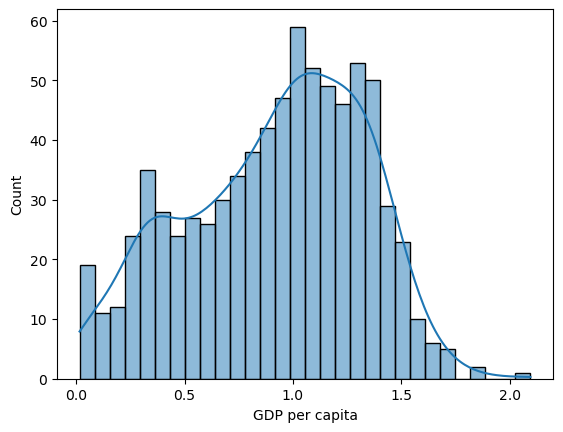

In [351]:
# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the GDP per capita ranges. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

sns.histplot(df['GDP per capita'], bins = 30, kde = True)

In [352]:
# Derive new column 'Happiness-range'

df.loc[df['GDP per capita'] < 0.6, 'GDP-range'] = 'Low GDP'

In [353]:
df.loc[(df['GDP per capita'] >= 0.6) & (df['GDP per capita'] < 1.2), 'GDP-range'] = 'Mid GDP'

In [354]:
df.loc[df['GDP per capita'] >= 1.2, 'GDP-range'] = 'High GDP'

In [355]:
df['GDP-range'].value_counts(dropna=False)

Mid GDP     367
High GDP    222
Low GDP     193
Name: GDP-range, dtype: int64

In [356]:
df.head()

,Year,Country,Region,Overall rank,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Happiness-range,GDP-range
0,2019,Finland,Western Europe,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393,High score,High GDP
1,2019,Denmark,Western Europe,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410,High score,High GDP
2,2019,Norway,Western Europe,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341,High score,High GDP
3,2019,Iceland,Western Europe,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118,High score,High GDP
4,2019,Netherlands,Western Europe,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298,High score,High GDP


#### 2b. Social-range

<AxesSubplot:xlabel='Social support', ylabel='Count'>

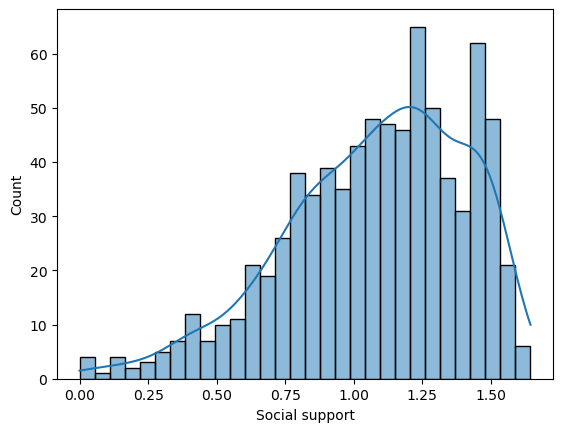

In [357]:
sns.histplot(df['Social support'], bins = 30, kde = True)

In [358]:
df.loc[df['Social support'] < 1.0, 'Social-range'] = 'Low Social'

In [359]:
df.loc[(df['Social support'] >= 1.0) & (df['Social support'] < 1.25), 'Social-range'] = 'Mid Social'

In [360]:
df.loc[(df['Social support'] >= 1.25), 'Social-range'] = 'High Social'

In [361]:
df['Social-range'].value_counts(dropna=False)

Low Social     287
High Social    268
Mid Social     227
Name: Social-range, dtype: int64

In [362]:
df.head()

,Year,Country,Region,Overall rank,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Happiness-range,GDP-range,Social-range
0,2019,Finland,Western Europe,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393,High score,High GDP,High Social
1,2019,Denmark,Western Europe,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410,High score,High GDP,High Social
2,2019,Norway,Western Europe,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341,High score,High GDP,High Social
3,2019,Iceland,Western Europe,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118,High score,High GDP,High Social
4,2019,Netherlands,Western Europe,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298,High score,High GDP,High Social


#### 2c. Healty-range

<AxesSubplot:xlabel='Healthy life expectancy', ylabel='Count'>

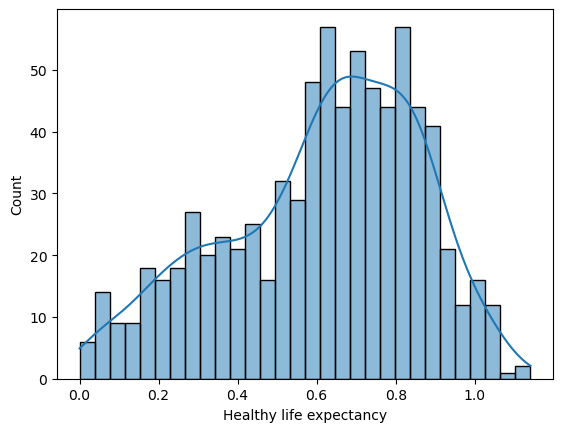

In [363]:
sns.histplot(df['Healthy life expectancy'], bins = 30, kde = True)

In [364]:
df.loc[df['Healthy life expectancy'] < 0.5, 'Healthy-range'] = 'Low Healthy'

In [365]:
df.loc[(df['Healthy life expectancy'] >= 0.5) & (df['Healthy life expectancy'] < 0.8), 'Healthy-range'] = 'Mid Healthy'

In [366]:
df.loc[df['Healthy life expectancy'] >= 0.8, 'Healthy-range'] = 'High Healthy'

In [367]:
df['Healthy-range'].value_counts(dropna=False)

Mid Healthy     351
Low Healthy     227
High Healthy    204
Name: Healthy-range, dtype: int64

#### Freedom-range

<AxesSubplot:xlabel='Freedom to make life choices', ylabel='Count'>

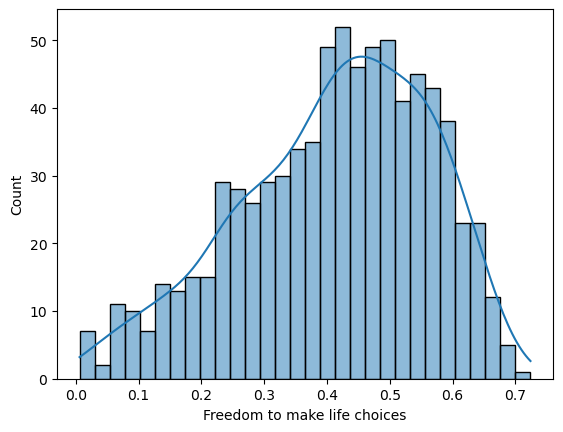

In [368]:
sns.histplot(df['Freedom to make life choices'], bins = 30, kde = True)

In [369]:
df.loc[df['Freedom to make life choices'] < 0.3, 'Freedom-range'] = 'Low Freedom'

In [370]:
df.loc[(df['Freedom to make life choices'] >= 0.3) & (df['Freedom to make life choices'] < 0.5), 'Freedom-range'] = 'Mid Freedom'

In [371]:
df.loc[df['Freedom to make life choices'] >= 0.5, 'Freedom-range'] = 'High Freedom'

In [372]:
df['Freedom-range'].value_counts(dropna=False)

Mid Freedom     352
High Freedom    247
Low Freedom     183
Name: Freedom-range, dtype: int64

#### Generocity-range

<AxesSubplot:xlabel='Generosity', ylabel='Count'>

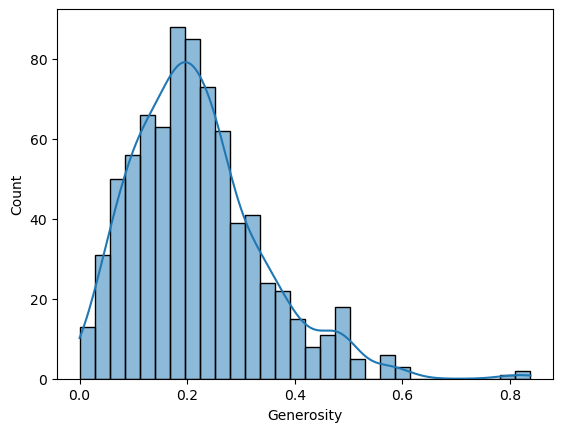

In [373]:
sns.histplot(df['Generosity'], bins = 30, kde = True)

In [374]:
df.loc[df['Generosity'] < 0.15, 'Generosity-range'] = 'Low Generosity'

In [375]:
df.loc[(df['Generosity'] >= 0.15) & (df['Generosity'] < 0.30), 'Generosity-range'] = 'Mid Generosity'

In [376]:
df.loc[df['Generosity'] >= 0.30, 'Generosity-range'] = 'High Generosity'

In [377]:
df['Generosity-range'].value_counts(dropna=False)

Mid Generosity     378
Low Generosity     240
High Generosity    164
Name: Generosity-range, dtype: int64

#### Corruption-range

<AxesSubplot:xlabel='Perceptions of corruption', ylabel='Count'>

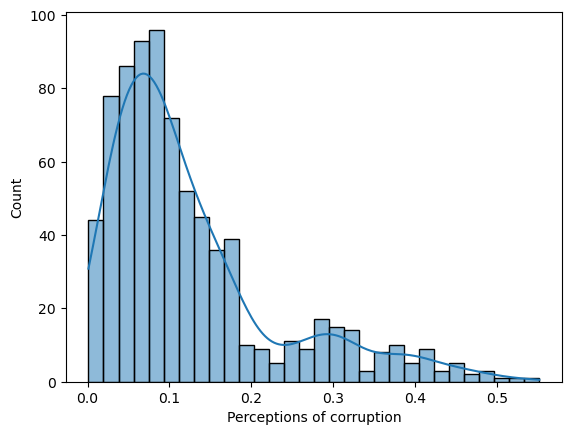

In [378]:
sns.histplot(df['Perceptions of corruption'], bins = 30, kde = True)

In [379]:
df.loc[df['Perceptions of corruption'] < 0.1, 'Corruption-range'] = 'Low Corruption'

In [380]:
df.loc[(df['Perceptions of corruption'] >= 0.1) & (df['Perceptions of corruption'] < 0.2), 'Corruption-range'] = 'Mid Corruption'

In [381]:
df.loc[df['Perceptions of corruption'] >= 0.2, 'Corruption-range'] = 'High Corruption'

In [382]:
df['Corruption-range'].value_counts(dropna=False)

Low Corruption     425
Mid Corruption     225
High Corruption    132
Name: Corruption-range, dtype: int64

#### Happiness by Region

In [396]:
df['Region Happiness'] = df.groupby(['Region', 'Year'])['Happiness score'].transform('mean')


In [399]:
df.to_clipboard()

In [410]:
# Group the DataFrame by year and region
grouped = df.groupby(['Region', 'Year'])

# Print the result
print(grouped.mean())

                                      Overall rank  Happiness score  \
Region                          Year                                  
Australia and New Zealand       2015      9.500000         7.285000   
                                2016      8.500000         7.323500   
                                2017      9.000000         7.299000   
                                2018      9.000000         7.298000   
                                2019      9.500000         7.267500   
Central and Eastern Europe      2015     79.000000         5.332931   
                                2016     78.448276         5.370690   
                                2017     75.068966         5.409931   
                                2018     74.965517         5.463966   
                                2019     70.965517         5.561517   
Eastern Asia                    2015     64.500000         5.626167   
                                2016     67.166667         5.624167   
      

#### Region Happy-range

In [411]:

df.loc[df['Region Happiness'] < 4.5, 'Reg-happy-range'] = 'Low score'

In [412]:
df.loc[(df['Region Happiness'] >= 4.5) & (df['Region Happiness'] < 6.5), 'Reg-happy-range'] = 'Middle score'

In [413]:
df.loc[df['Region Happiness'] >= 6.5, 'Reg-happy-range'] = 'High score' 

In [414]:
df['Reg-happy-range'].value_counts(dropna=False)

Middle score    463
Low score       196
High score      123
Name: Reg-happy-range, dtype: int64

In [415]:
df['Region'].value_counts()

Sub-Saharan Africa                 196
Central and Eastern Europe         145
Latin America and Caribbean        111
Western Europe                     103
Middle East and Northern Africa     98
Southeastern Asia                   44
Southern Asia                       35
Eastern Asia                        30
Australia and New Zealand           10
North America                       10
Name: Region, dtype: int64

In [416]:
df[['Region','Reg-happy-range']].to_clipboard()

#### Clusters Variable

In [418]:
df.shape

(782, 20)

In [419]:
# exclude all categorical columns 

dfnum=df[['Happiness score','GDP per capita','Social support',
          'Healthy life expectancy','Freedom to make life choices','Generosity',
          'Perceptions of corruption']]

In [420]:
dfnum.head()

,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [422]:
dfnum.columns

Index(['Happiness score', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [423]:
from sklearn.cluster import KMeans
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [424]:
score = [kmeans[i].fit(dfnum).score(dfnum) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/Users/sukihabibe/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sukihabibe/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sukihabibe/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sukihabibe/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  war

[-1292.590068576026,
 -487.9020300808546,
 -305.97189092509285,
 -236.70337725346909,
 -193.8370774221636,
 -176.4128074721861,
 -162.1639289059658,
 -151.48851415321292,
 -143.85260375781542]

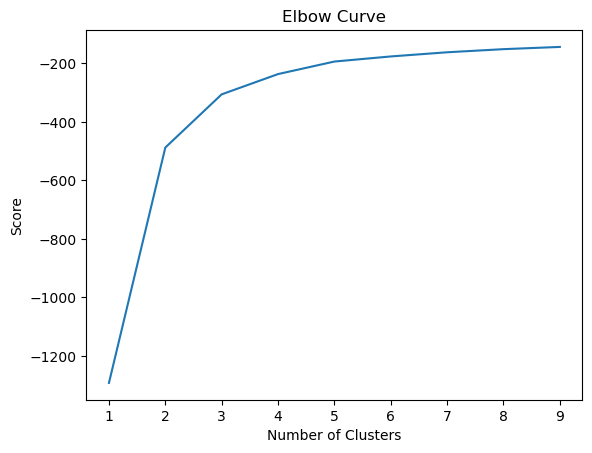

In [425]:
# Plot the elbow curve using PyLab.

import pylab as pl
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

## The elbow starts to flatten starting at 4. The best number of clusters seem to be 4. 

In [426]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 

In [427]:
# Fit the k-means object to the data.

kmeans.fit(dfnum)

/Users/sukihabibe/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [428]:
df.shape

(782, 20)

In [429]:
df['clusters'] = kmeans.fit_predict(dfnum)

/Users/sukihabibe/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [430]:
df.head()

,Year,Country,Region,Overall rank,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,...,Happiness-range,GDP-range,Social-range,Healthy-range,Freedom-range,Generosity-range,Corruption-range,Region Happiness,Reg-happy-range,clusters
0,2019,Finland,Western Europe,1,7.769,1.340,1.587,0.986,0.596,0.153,...,High score,High GDP,High Social,High Healthy,High Freedom,Mid Generosity,High Corruption,6.8984,High score,1
1,2019,Denmark,Western Europe,2,7.600,1.383,1.573,0.996,0.592,0.252,...,High score,High GDP,High Social,High Healthy,High Freedom,Mid Generosity,High Corruption,6.8984,High score,1
2,2019,Norway,Western Europe,3,7.554,1.488,1.582,1.028,0.603,0.271,...,High score,High GDP,High Social,High Healthy,High Freedom,Mid Generosity,High Corruption,6.8984,High score,1
3,2019,Iceland,Western Europe,4,7.494,1.380,1.624,1.026,0.591,0.354,...,High score,High GDP,High Social,High Healthy,High Freedom,High Generosity,Mid Corruption,6.8984,High score,1
4,2019,Netherlands,Western Europe,5,7.488,1.396,1.522,0.999,0.557,0.322,...,High score,High GDP,High Social,High Healthy,High Freedom,High Generosity,High Corruption,6.8984,High score,1


In [433]:
df['clusters'].value_counts(dropna=False)

2    240
0    234
3    180
1    128
Name: clusters, dtype: int64

### 3. Exporting data

In [434]:
# Export cust_ords_prods as "cop_dep.pkl"
df.to_csv(os.path.join(path, '02_Data', 'Prepared','dfall_4.csv'))